<a href="https://colab.research.google.com/github/jw00oo1/Dacon/blob/main/PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#connect to Drive and load data
import os

#mkdir
path = Path(os.getcwd()) / 'data'
if not os.path.isdir(path):
    os.mkdir(path)

In [ ]:
#copy csv
!cp "/content/drive/My Drive/Dacon/monthly8/open data/test_x.csv" "./data"
!cp "/content/drive/My Drive/Dacon/monthly8/open data/train.csv" "./data"

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [ ]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path / 'test_x.csv')
#submission = pd.read_csv(path / 'sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)
#print(submission.shape)

(45532, 78)
(11383, 77)


In [ ]:
train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(45532, 77)
(11383, 76)


In [ ]:
train.tail()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
3886,4.0,664,2.0,1089,1.0,1359,2.0,648,2.0,989,2.0,543,2.0,545,1.0,1211,3.0,1196,3.0,1744,5.0,869.0,5.0,771.0,2.0,659.0,2.0,2184.0,2.0,1026.0,1.0,838.0,5.0,445.0,4.0,1643.0,4.0,590.0,4.0,777.0,10s,2.0,1.0,2.0,Male,1.0,1.0,White,Atheist,1.0,1.0,4.0,5.0,1.0,4.0,1.0,4.0,3.0,6.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3887,3.0,766,3.0,1519,2.0,1961,3.0,1809,3.0,1288,3.0,681,3.0,2354,3.0,3365,3.0,3251,3.0,3004,3.0,2476.0,4.0,1818.0,3.0,929.0,4.0,1597.0,4.0,1917.0,2.0,1167.0,4.0,1909.0,3.0,2061.0,4.0,1107.0,4.0,3541.0,30s,2.0,2.0,2.0,Male,1.0,1.0,Other,Other,3.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3888,3.0,334,3.0,1846,5.0,676,1.0,1296,1.0,1003,1.0,689,3.0,487,1.0,1271,3.0,3453,5.0,1563,3.0,468.0,1.0,632.0,5.0,478.0,1.0,266.0,4.0,874.0,3.0,775.0,1.0,459.0,3.0,705.0,5.0,345.0,5.0,502.0,10s,4.0,1.0,3.0,Female,1.0,1.0,Asian,Muslim,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3889,5.0,616,1.0,586,4.0,1055,4.0,471,2.0,132,5.0,321,2.0,696,1.0,551,2.0,1142,4.0,1247,5.0,827.0,1.0,761.0,4.0,673.0,2.0,658.0,4.0,533.0,5.0,531.0,1.0,138.0,4.0,613.0,4.0,506.0,2.0,696.0,10s,2.0,1.0,3.0,Female,1.0,1.0,White,Christian_Protestant,5.0,5.0,1.0,5.0,2.0,2.0,1.0,4.0,1.0,5.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3890,5.0,372,2.0,1857,3.0,858,3.0,1069,4.0,918,4.0,732,4.0,780,2.0,19550,4.0,1669,4.0,1819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 처리할 열 별로 나누기

In [ ]:
t_train = train.iloc[:,1]
a_train = train.iloc[:,0]
for i in range(2,40):
    if i%2:
        t_train = pd.concat([t_train, train.iloc[:,i]],axis=1)
    else :
        a_train = pd.concat([a_train, train.iloc[:,i]], axis=1)

In [ ]:
tp_train = train.iloc[:,49:59]  #"I see myself as : "
word_train = train.iloc[:,-16:] #실존 / 허구인 단어의 정의를 앎

In [ ]:
pure_train = train.iloc[:,40:49]
pure_train = pd.concat([pure_train, train.iloc[:,59:-16]], axis=1)
pure_train = pure_train.drop('hand', axis=1)

In [ ]:
pure_x_train = pure_train.drop('voted', axis=1)

# 1. ***PyCaret***

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
py_train = pd.concat([pd.DataFrame(tsne_results), train.iloc[:,40:]],axis=1)
py_train.sample(5)

In [ ]:
km_train = pd.concat([km_categorical, train.iloc[:,40:]], axis=1)
km_train.head()
km_train.drop('hand', axis=1)

In [ ]:
gmm_total_result.head()

In [ ]:
tmp = gmm_total_result.drop(['familysize', 'married'], axis=1)

In [ ]:
clf = setup(data = tmp, target = 'voted')

,Description,Value
0,session_id,741
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 9)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_3 = compare_models(sort='AUC', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6961,0.7638,0.6269,0.7745,0.6929,0.3986,0.4074,2.491
lightgbm,Light Gradient Boosting Machine,0.6990,0.7632,0.6209,0.7840,0.6929,0.4056,0.4163,0.332
catboost,CatBoost Classifier,0.6940,0.7604,0.6360,0.7650,0.6945,0.3932,0.3999,14.092
lda,Linear Discriminant Analysis,0.6890,0.7582,0.6569,0.7446,0.6980,0.3801,0.3833,0.231
lr,Logistic Regression,0.6894,0.7573,0.6547,0.7464,0.6975,0.3812,0.3847,0.642
xgboost,Extreme Gradient Boosting,0.6922,0.7573,0.6353,0.7625,0.6931,0.3896,0.3961,4.782
ada,Ada Boost Classifier,0.6896,0.7569,0.6463,0.7514,0.6949,0.3826,0.3871,0.887
nb,Naive Bayes,0.6816,0.7368,0.6254,0.7510,0.6824,0.3685,0.3748,0.059
rf,Random Forest Classifier,0.6665,0.7306,0.6559,0.7119,0.6827,0.3326,0.3339,2.607
et,Extra Trees Classifier,0.6674,0.7187,0.6293,0.7262,0.6742,0.3380,0.3417,3.195


In [ ]:
blended = blend_models(estimator_list=best_3, fold=5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6966,0.7673,0.6292,0.7739,0.6941,0.3995,0.4079
1,0.6891,0.7560,0.6131,0.7716,0.6833,0.3857,0.3956
2,0.7011,0.7697,0.6341,0.7785,0.6989,0.4083,0.4168
3,0.6988,0.7599,0.6301,0.7771,0.6959,0.4039,0.4126
4,0.6985,0.7681,0.6246,0.7804,0.6939,0.4039,0.4136
Mean,0.6968,0.7642,0.6262,0.7763,0.6932,0.4003,0.4093
SD,0.0041,0.0053,0.0072,0.0032,0.0053,0.0078,0.0074


In [ ]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.69,0.7534,0.6902,0.6924,0.6905,0.3783,0.379


In [ ]:
final_model = finalize_model(blended)

In [ ]:
prediction = predict_model(final_model, data = test)
prediction

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Label,Score
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2,0.6829
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.8642
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,0.4855
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.1948
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,2,0.7764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0.4088
11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0.8628
11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0.2369
11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0.3222


In [ ]:
submission['voted'] = prediction['Score']

In [ ]:
submission.to_csv('submission_proba.csv', index = False)

In [ ]:
print(prediction['Score'].head)

<bound method NDFrame.head of 0        0.6829
1        0.8642
2        0.4855
3        0.1948
4        0.7764
          ...  
11378    0.4088
11379    0.8628
11380    0.2369
11381    0.3222
11382    0.6332
Name: Score, Length: 11383, dtype: float64>


# ***정규화***

In [ ]:
a_train.head()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0


In [ ]:
def normalize(dataset) :
    dataNorm = ((dataset - dataset.mean(axis=0))/(dataset.std(axis=0)))
    return dataNorm

nt_data = normalize(t_train)

In [ ]:
total_answer_data = pd.concat([nt_data, a_train], axis=1)

In [ ]:
total_answer_data.head()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
0,-0.044538,-0.024458,-0.054279,-0.042725,-0.019290,-0.017240,-0.071604,-0.006950,-0.025631,-0.023827,-0.037665,-0.007888,-0.015925,-0.024511,-0.078964,-0.027285,-0.035027,-0.010755,-0.071449,-0.016715,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,-0.022818,-0.026159,0.211938,0.135346,0.144886,0.004460,-0.047005,-0.001000,-0.019281,-0.024252,0.029455,0.000508,0.030259,0.147892,-0.020439,0.030018,0.008959,0.003832,0.422395,-0.013283,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,0.051825,-0.021175,-0.051605,0.172425,-0.033894,-0.017345,-0.012054,-0.007108,-0.012397,-0.018615,-0.033918,-0.003259,-0.015035,0.203258,-0.012144,-0.019324,-0.009657,-0.007713,0.000791,-0.012347,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,-0.033754,0.003623,-0.054835,0.160614,-0.092311,-0.004359,-0.115369,-0.004600,-0.011031,0.056134,0.038447,-0.006674,0.092895,0.043632,-0.024586,0.855101,-0.025474,0.042884,0.165182,-0.013788,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,-0.001404,-0.044243,-0.103400,-0.039246,-0.052987,-0.016070,-0.030093,-0.006624,-0.025535,-0.021960,-0.042324,-0.006988,-0.019962,-0.065568,-0.062835,-0.018978,-0.036938,-0.009446,-0.078175,-0.005216,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0


In [ ]:
n_train = pd.concat([nt_data, a_train],axis=1)
#n_train = a_train

In [ ]:
n_train.drop('index', axis=1)

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
0,-0.044538,-0.024458,-0.054279,-0.042725,-0.019290,-0.017240,-0.071604,-0.006950,-0.025631,-0.023827,-0.037665,-0.007888,-0.015925,-0.024511,-0.078964,-0.027285,-0.035027,-0.010755,-0.071449,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,-0.022818,-0.026159,0.211938,0.135346,0.144886,0.004460,-0.047005,-0.001000,-0.019281,-0.024252,0.029455,0.000508,0.030259,0.147892,-0.020439,0.030018,0.008959,0.003832,0.422395,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,0.051825,-0.021175,-0.051605,0.172425,-0.033894,-0.017345,-0.012054,-0.007108,-0.012397,-0.018615,-0.033918,-0.003259,-0.015035,0.203258,-0.012144,-0.019324,-0.009657,-0.007713,0.000791,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,-0.033754,0.003623,-0.054835,0.160614,-0.092311,-0.004359,-0.115369,-0.004600,-0.011031,0.056134,0.038447,-0.006674,0.092895,0.043632,-0.024586,0.855101,-0.025474,0.042884,0.165182,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,-0.001404,-0.044243,-0.103400,-0.039246,-0.052987,-0.016070,-0.030093,-0.006624,-0.025535,-0.021960,-0.042324,-0.006988,-0.019962,-0.065568,-0.062835,-0.018978,-0.036938,-0.009446,-0.078175,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.008003,-0.046869,-0.128797,-0.110383,-0.077647,-0.020815,-0.099380,-0.008169,-0.026735,-0.042472,-0.046527,-0.009624,-0.022073,-0.112587,0.044170,-0.045938,-0.014722,-0.014578,-0.077772,2.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,1.0,2.0,4.0,2.0,1.0,5.0,4.0
45528,-0.027865,-0.024965,-0.035677,-0.063416,-0.013125,-0.016964,-0.066069,-0.006313,0.003727,-0.021886,0.014304,-0.006750,-0.016031,0.075149,0.008133,-0.035169,-0.017788,-0.009123,-0.068624,2.0,3.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,5.0,2.0,5.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0
45529,-0.026948,-0.039767,-0.048709,0.002227,-0.012527,-0.007855,-0.019536,-0.006576,-0.016286,-0.015012,-0.031832,-0.006147,-0.001889,-0.011734,-0.012697,-0.016671,-0.030273,-0.004665,0.025679,4.0,1.0,1.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0,1.0,5.0,5.0,3.0,1.0
45530,-0.015170,-0.025622,-0.065974,-0.019196,-0.034193,-0.016451,-0.065044,-0.006285,-0.020324,-0.033380,-0.033038,-0.008186,0.028280,-0.043080,-0.087259,-0.027708,0.006516,-0.005333,-0.057458,1.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,4.0,3.0,1.0,1.0,4.0,4.0,4.0,1.0


In [ ]:
n_train = pd.concat([n_train, train.iloc[:,41:-16]], axis=1)
#n_train = n_train.drop('voted',axis=1)

In [ ]:
n_train.head()

,index,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted
0,-1.731994,-0.044538,-0.024458,-0.054279,-0.042725,-0.019290,-0.017240,-0.071604,-0.006950,-0.025631,-0.023827,-0.037665,-0.007888,-0.015925,-0.024511,-0.078964,-0.027285,-0.035027,-0.010755,-0.071449,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2
1,-1.731918,-0.022818,-0.026159,0.211938,0.135346,0.144886,0.004460,-0.047005,-0.001000,-0.019281,-0.024252,0.029455,0.000508,0.030259,0.147892,-0.020439,0.030018,0.008959,0.003832,0.422395,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2
2,-1.731842,0.051825,-0.021175,-0.051605,0.172425,-0.033894,-0.017345,-0.012054,-0.007108,-0.012397,-0.018615,-0.033918,-0.003259,-0.015035,0.203258,-0.012144,-0.019324,-0.009657,-0.007713,0.000791,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1
3,-1.731766,-0.033754,0.003623,-0.054835,0.160614,-0.092311,-0.004359,-0.115369,-0.004600,-0.011031,0.056134,0.038447,-0.006674,0.092895,0.043632,-0.024586,0.855101,-0.025474,0.042884,0.165182,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1
4,-1.731689,-0.001404,-0.044243,-0.103400,-0.039246,-0.052987,-0.016070,-0.030093,-0.006624,-0.025535,-0.021960,-0.042324,-0.006988,-0.019962,-0.065568,-0.062835,-0.018978,-0.036938,-0.009446,-0.078175,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1


In [ ]:
n_train.drop('index',axis=1)

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted
0,-0.044538,-0.024458,-0.054279,-0.042725,-0.019290,-0.017240,-0.071604,-0.006950,-0.025631,-0.023827,-0.037665,-0.007888,-0.015925,-0.024511,-0.078964,-0.027285,-0.035027,-0.010755,-0.071449,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2
1,-0.022818,-0.026159,0.211938,0.135346,0.144886,0.004460,-0.047005,-0.001000,-0.019281,-0.024252,0.029455,0.000508,0.030259,0.147892,-0.020439,0.030018,0.008959,0.003832,0.422395,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2
2,0.051825,-0.021175,-0.051605,0.172425,-0.033894,-0.017345,-0.012054,-0.007108,-0.012397,-0.018615,-0.033918,-0.003259,-0.015035,0.203258,-0.012144,-0.019324,-0.009657,-0.007713,0.000791,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1
3,-0.033754,0.003623,-0.054835,0.160614,-0.092311,-0.004359,-0.115369,-0.004600,-0.011031,0.056134,0.038447,-0.006674,0.092895,0.043632,-0.024586,0.855101,-0.025474,0.042884,0.165182,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1
4,-0.001404,-0.044243,-0.103400,-0.039246,-0.052987,-0.016070,-0.030093,-0.006624,-0.025535,-0.021960,-0.042324,-0.006988,-0.019962,-0.065568,-0.062835,-0.018978,-0.036938,-0.009446,-0.078175,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.008003,-0.046869,-0.128797,-0.110383,-0.077647,-0.020815,-0.099380,-0.008169,-0.026735,-0.042472,-0.046527,-0.009624,-0.022073,-0.112587,0.044170,-0.045938,-0.014722,-0.014578,-0.077772,2.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,1.0,2.0,4.0,2.0,1.0,5.0,4.0,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2
45528,-0.027865,-0.024965,-0.035677,-0.063416,-0.013125,-0.016964,-0.066069,-0.006313,0.003727,-0.021886,0.014304,-0.006750,-0.016031,0.075149,0.008133,-0.035169,-0.017788,-0.009123,-0.068624,2.0,3.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,5.0,2.0,5.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2
45529,-0.026948,-0.039767,-0.048709,0.002227,-0.012527,-0.007855,-0.019536,-0.006576,-0.016286,-0.015012,-0.031832,-0.006147,-0.001889,-0.011734,-0.012697,-0.016671,-0.030273,-0.004665,0.025679,4.0,1.0,1.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0,1.0,5.0,5.0,3.0,1.0,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1
45530,-0.015170,-0.025622,-0.065974,-0.019196,-0.034193,-0.016451,-0.065044,-0.006285,-0.020324,-0.033380,-0.033038,-0.008186,0.028280,-0.043080,-0.087259,-0.027708,0.006516,-0.005333,-0.057458,1.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,4.0,3.0,1.0,1.0,4.0,4.0,4.0,1.0,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1


#***t-sne***

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=27, verbose = 2, n_iter=250)
tsne_results = tsne.fit_transform(total_answer_data.values)

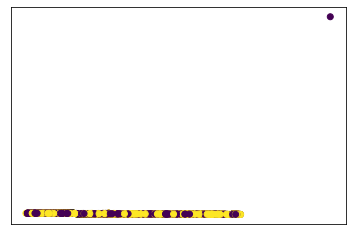

In [ ]:
figure, axesSubplot = plt.subplots()
axesSubplot.scatter(tsne_results[:,0], tsne_results[:,1], c=train['voted'])
axesSubplot.set_xticks(())
axesSubplot.set_yticks(())

plt.show()

# ***3. K-means Clustering***

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
input_data = pd.concat([a_train, tp_train],axis=1)

In [ ]:
num = 5
kmeans = KMeans(n_clusters=num).fit(input_data.values)

In [ ]:
pd_km_result = pd.DataFrame(kmeans.labels_.reshape(-1,1), columns=['km_result'])

In [ ]:
km_result = pd.concat([pd_km_result, train.loc[:,['voted']]], axis=1)

In [ ]:
km_result

,km_result,voted
0,0,2
1,2,2
2,2,1
3,3,1
4,2,1
...,...,...
45527,1,2
45528,3,2
45529,2,1
45530,0,1


In [ ]:
km_total_result = pd.concat([pd_km_result, pure_train], axis=1)

In [ ]:
grouping_km = km_result.groupby(['voted'])['km_result'].value_counts()

In [ ]:
grouping_km

voted  km_result
1      0            5059
       2            4987
       3            4198
       4            3802
       1            2588
2      0            5961
       4            5167
       1            4935
       3            4693
       2            4142
Name: km_result, dtype: int64

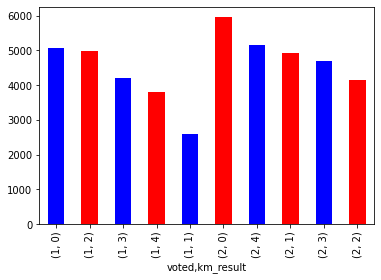

In [ ]:
grouping_km.plot.bar(color=['b','r'])

In [ ]:
arr = np.zeros(shape=(num))
for i in range(num):
    arrco[i] = np.sum(kmeans.labels_==i)
print(arr)

In [ ]:
km_categorical = pd.DataFrame(kmeans.labels_.transpose(), columns=['K_label'])
km_categorical['K_label'] = pd.Categorical(km_categorical.K_label)

In [ ]:
km_categorical.dtypes

K_label    category
dtype: object

#***GMM***

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
input_data = pd.concat([a_train, tp_train, word_train], axis=1)

In [ ]:
num_components = 2

#normalize 하고 오기(결과가 너무 고루분포함)
gmm = GMM(n_components = num_components, max_iter=1000, covariance_type='full').fit(input_data)

In [ ]:
gmm_result = gmm.predict(input_data)

In [ ]:
gmm_result.shape

(45532,)

In [ ]:
train.shape

(45532, 77)

In [ ]:
gmm_result.ctypes

In [ ]:
pd_gmm_result = pd.DataFrame(gmm_result.reshape(-1,1), columns=['gmm_result'])

In [ ]:
check_corr = pd.concat([pd_gmm_result, train.loc[:,['voted']]], axis = 1)

In [ ]:
check_corr.head()

,gmm_result,voted
0,1,2
1,1,2
2,0,1
3,1,1
4,1,1


In [ ]:
grouping_gmm = check_corr.groupby(['voted'])['gmm_result'].value_counts()

In [ ]:
print(grouping_gmm)

voted  gmm_result
1      1             16572
       0              4062
2      1             20423
       0              4475
Name: gmm_result, dtype: int64


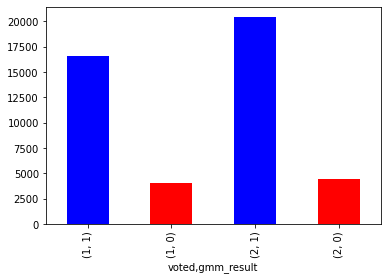

In [ ]:
grouping_gmm.plot.bar(color=['b','r'])

In [ ]:
gmm_total_result = pd.concat([pd_gmm_result, pure_train], axis=1)

gmm_total_result.head()

,gmm_result,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,1,30s,2,1,4,Female,3,White,Other,1,2
1,1,20s,4,2,3,Female,1,Asian,Hindu,3,2
2,0,30s,3,1,3,Male,2,White,Other,2,1
3,1,20s,4,2,0,Female,1,Asian,Hindu,3,1
4,1,20s,3,1,2,Male,2,White,Agnostic,1,1


##Heatmap

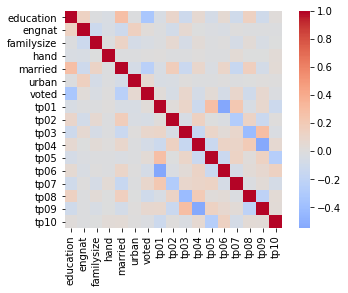

In [ ]:
"""연속형 데이터에 대해서만 상관관계 분석이 가능함

"""

tmp = pd.concat([pure_train, tp_train], axis=1)
correlations = tmp.corr(method='spearman')
sns.heatmap(correlations, cmap='coolwarm', square=True, center=0)

In [ ]:
pure_train.head()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,voted
0,30s,2,1,4,Female,1,3,White,Other,1,2
1,20s,4,2,3,Female,1,1,Asian,Hindu,3,2
2,30s,3,1,3,Male,1,2,White,Other,2,1
3,20s,4,2,0,Female,1,1,Asian,Hindu,3,1
4,20s,3,1,2,Male,1,2,White,Agnostic,1,1
